<center><h1>Understanding Heart Disease: An In-depth Analysis</h1></center>

Created By: Ishan Chethan

<center><h2>Introduction</h2></center>

The main purpose of this project is to take you through an entire data science pipeline. In order to do so, we have chosen to focus on the analysis of heart disease data. Heart disease is a leading cause of mortality worldwide, making it a crucial area of study in public health. By analyzing heart disease data, we can identify key risk factors and develop strategies to mitigate these risks, ultimately improving health outcomes.

For this analysis, we will use the Heart Disease dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). This dataset provides detailed information on various attributes related to heart disease, allowing us to perform comprehensive analyses and build predictive models.

### Importance

Understanding the factors that contribute to heart disease is essential for healthcare providers, researchers, and policymakers. By identifying these factors, we can develop targeted interventions to reduce the incidence of heart disease and improve the quality of life for individuals at risk. Additionally, predictive models can help in early detection and prevention, potentially saving lives.

Throughout this tutorial, we will walk you through the Data Science Pipeline as follows:

1. **[Data Collection](#data-collection)** - We will start by loading and understanding the heart disease dataset provided by UCI.

2. **[Data Processing](#data-processing)** - This step involves cleaning the data, handling missing values, and preparing the dataset for analysis.

3. **[Exploratory Analysis and Data Visualization](#exploratory-analysis-and-data-visualization)** - We will explore the data using descriptive statistics and visualizations to identify patterns and trends.

4. **[Hypothesis Testing](#hypothesis-testing)** - Conduct hypothesis testing to make statistical inferences about the data and validate assumptions.

5. **[Machine Learning Analysis](#machine-learning-analysis)** - Apply various machine learning algorithms such as logistic regression, random forests, and others to build predictive models and extract insights from the data.

6. **[Insights and Conclusion](#insights-and-conclusion)** - Summarize findings, draw conclusions, and propose future directions for research and exploration based on the analysis conducted throughout the tutorial.

By the end of this tutorial, you will have a comprehensive understanding of the data science pipeline and the factors affecting heart disease. This knowledge can inform future research and policy-making aimed at improving health outcomes.

<a name="data-collection"></a>
<center><h2>Data Collection</h2></center>

Our primary objective is to procure datasets pertinent to our analysis of heart disease. We can turn to the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease), a trusted source for quality datasets.

### Heart Disease Dataset
Our journey begins with the heart disease dataset available on the UCI Machine Learning Repository website. This dataset contains detailed information on various attributes related to heart disease, making it an invaluable resource for our analysis. We can access and download the dataset, ensuring its integrity and adherence to our data quality standards.  
### Dataset Integration
Upon obtaining the heart disease dataset, we can integrate it into our project environment. The dataset serves as the cornerstone of our analysis, providing rich insights into the factors influencing heart disease occurrence and progression.  
### Python Environment Setup
To facilitate our analysis, we will use the Python programming language. Our toolkit includes essential tools such as iPython and Jupyter Notebook, to provide an interactive and intuitive environment for data exploration and analysis.  
### Library Imports
The basis of our project revolves around several indispensable libraries that streamline our data manipulation and analysis:

In [5]:
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from scipy.stats import ttest_ind, chi2_contingency

<a name="data-processing"></a>
<center><h2>Data Processing</h2></center>

### Define column names based on dataset description:
- The dataset from the UCI repository doesn't come with column names. Therefore, we define descriptive column names based on the dataset description to make it easier to understand the data.
  - 'age': Age of the patient
  - 'sex': Gender of the patient (1 = male; 0 = female)
  - 'cp': Type of chest pain experienced by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
  - 'trestbps': Resting blood pressure (in mm Hg)
  - 'chol': Serum cholesterol level (in mg/dl)
  - 'fbs': Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
  - 'restecg': Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
  - 'thalach': Maximum heart rate achieved
  - 'exang': Exercise-induced angina (1 = yes; 0 = no)
  - 'oldpeak': ST depression induced by exercise relative to rest
  - 'slope': Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
  - 'ca': Number of major vessels (0-3) colored by fluoroscopy
  - 'thal': Thalassemia type (3 = normal; 6 = fixed defect; 7 = reversable defect)
  - 'target': Presence of heart disease (1 = presence; 0 = absence)

### Load dataset from UCI repository:
- We fetch the dataset from the UCI repository using the provided URL.
- By specifying the names parameter in the pd.read_csv function, we assign the column names defined earlier to the dataset.

### Drop the columns that we will not use:
 - We drop the restecg, slope, ca, and thal columns as we do not need them for further analysis in this pipeline. But they can still be used in other ways for different anaysis.

### Rename columns to more descriptive names:
- The original column names might not be very descriptive or intuitive to someone unfamiliar with the dataset. Therefore, we rename the columns to more descriptive names.
  - 'age' to 'Age'
  - 'sex' to 'Sex'
  - 'cp' to 'ChestPainType'
  - 'trestbps' to 'RestingBloodPressure'
  - 'chol' to 'Cholesterol'
  - 'fbs' to 'FastingBloodSugar'
  - 'thalach' to 'MaxHeartRate'
  - 'exang' to 'ExerciseInducedAngina'
  - 'oldpeak' to 'STDepression'
  - 'target' to 'Target'
- This renaming step helps improve readability and understanding of the dataset.

### Display the first few rows of the dataset with renamed columns:
- Finally, we display the first few rows of the dataset with the newly renamed columns to verify that the renaming process was successful.
- This step allows us to visually inspect the dataset and ensure that the column names are now more descriptive and meaningful.

By following these steps, we enhance the clarity and usability of the dataset, making it easier to analyze and interpret the data for further analysis.

In [6]:
# Defines column names based on dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Loads dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data = pd.read_csv(url, names=column_names)

# Drops specified columns
columns_to_drop = ['restecg', 'slope', 'ca', 'thal']
heart_data.drop(columns=columns_to_drop, inplace=True)

# Renames columns to more descriptive names
heart_data.rename(columns={'age': 'Age', 'sex': 'Sex', 'cp': 'ChestPainType', 
                           'trestbps': 'RestingBloodPressure', 'chol': 'Cholesterol', 
                           'fbs': 'FastingBloodSugar', 'thalach': 'MaxHeartRate', 
                           'exang': 'ExerciseInducedAngina', 'oldpeak': 'STDepression', 
                           'target': 'Target'}, inplace=True)

# Displays the first 10 rows of the dataset with renamed columns
heart_data.head(10)

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,MaxHeartRate,ExerciseInducedAngina,STDepression,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,108.0,1.0,1.5,2
2,67.0,1.0,4.0,120.0,229.0,0.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,0
5,56.0,1.0,2.0,120.0,236.0,0.0,178.0,0.0,0.8,0
6,62.0,0.0,4.0,140.0,268.0,0.0,160.0,0.0,3.6,3
7,57.0,0.0,4.0,120.0,354.0,0.0,163.0,1.0,0.6,0
8,63.0,1.0,4.0,130.0,254.0,0.0,147.0,0.0,1.4,2
9,53.0,1.0,4.0,140.0,203.0,1.0,155.0,1.0,3.1,1


<a name="exploratory-analysis-and-data-visualization"></a>
<center><h2>Exploratory Analysis and Data Visualization</h2></center>

In think section, we will use various data visualizations like histograms, scatter plots, and bar plots to get a better understanding of the data. This part is kind of like detective work, where we are  basically searching for clues about how different factors might be related to heart disease or each other. For example, we might look at things like age, cholesterol levels, and chest pain types to see if there's any connection to whether someone has heart disease or not. By the end of this section, you'll have a good grasp of the dataset and some initial insights that can further guide our analysis.

### Histogram of Age Distribution

**Explanation:**  
This histogram gives us a visual representation of the ages of individuals in our dataset. Each bar represents a range of ages, showing us how many people fall into each age group.  
**Importance:**  
Knowing the age distribution is important for understanding who's at risk for heart disease. Different age groups may have different risk factors or rates of heart disease, so by looking at this histogram, we can pinpoint which age ranges might need more attention when it comes to prevention and treatment.  
**Insights:**  
By studying the shape of the histogram, we can pick up on any patterns or trends in heart disease occurrence across different age groups. For example, if we see a spike in heart disease cases in a particular age range, it might indicate that something unique is happening in that demographic that's worth investigating further.

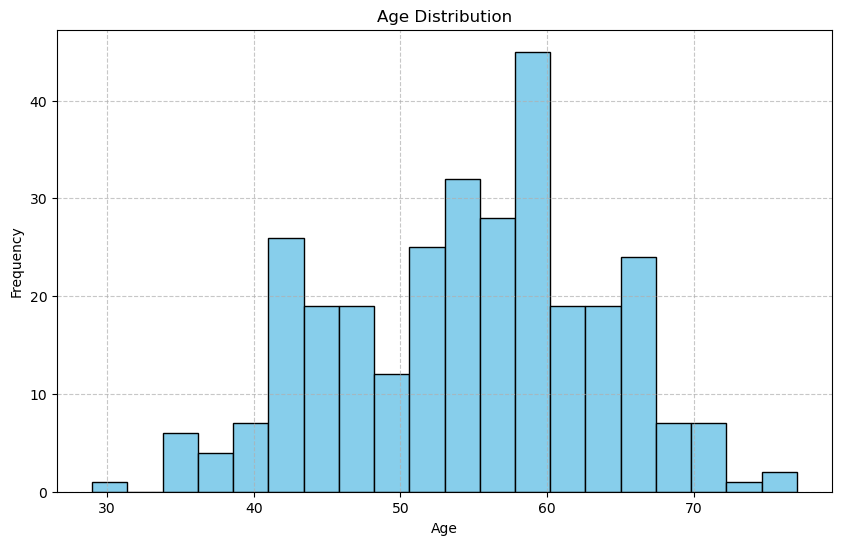

In [7]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the histogram
plt.hist(heart_data['Age'], bins=20, color='skyblue', edgecolor='black')

# Adds title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adds grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:** 
The histogram shows two peaks in heart disease cases: one between ages 40 to 50 and another between 50 to 60 years. This histograms also reveals that people in their late 50s are the most at risk. It's key to know these age-related trends for planning prevention and healthcare strategies effectively.

### Bar Plot of Sex Distribution

**Explanation:**  
This bar plot gives us a simple breakdown of the number of males and females in our dataset. Each bar represents one gender, with the height indicating how many individuals of that gender are in the dataset.  
**Importance:**  
Understanding the distribution of sexes is key for recognizing any potential differences in heart disease prevalence between males and females. It helps us tailor healthcare strategies to specific gender needs and ensure everyone gets the support they require.  
**Insights:**  
By looking at this plot, we can quickly see if there are more males or females in our dataset. If there's a significant difference in numbers, it could suggest that one gender is more affected by heart disease than the other. This insight can guide further investigation into potential gender disparities in heart health.

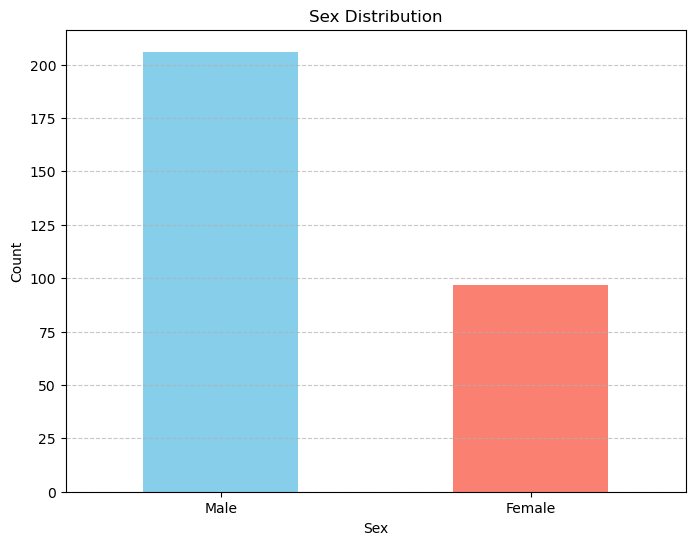

In [8]:
# Sets up the figure and axis
plt.figure(figsize=(8, 6))

# Creates the bar plot
heart_data['Sex'].replace({1.0: 'Male', 0.0: 'Female'}).value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adds title and labels
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# Makes sure the x axis labels are easier to read
plt.xticks(rotation=0)

# Adds grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:**
The bar plot gives us a clear picture of the gender distribution in the dataset, where males are represented as 1.0 and females as 0.0. It's pretty striking to see that heart disease is much more prevalent among males, given that the male column is more than double the size of the female column. This conclusion showcases the importance of understanding gender differences in heart disease prevalence for tailoring healthcare strategies to specific populations.

### Scatter Plot of Age vs. Cholesterol

**Explanation:**  
This scatter plot showcases the relationship between age and cholesterol levels among individuals in our dataset. Each point represents one person, with their age on the x-axis and their cholesterol level on the y-axis.  
**Importance:**  
Understanding how age correlates with cholesterol levels is important for assessing heart disease risk factors. If there's a trend where cholesterol levels increase with age, it could signal a higher risk of heart disease as people get older.  
**Insights:**  
By examining this plot, we can identify any patterns or trends between age and cholesterol levels. If the points on the plot form a clear upward or downward trend, it suggests a positive or negative correlation, respectively. Such insights help us understand how age influences cholesterol levels and, consequently, heart disease risk.

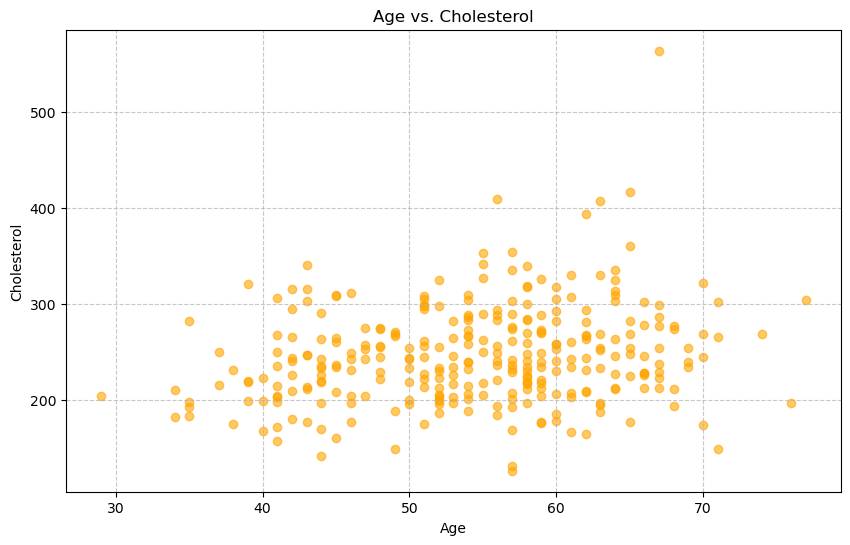

In [9]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the scatter plot
plt.scatter(heart_data['Age'], heart_data['Cholesterol'], color='orange', alpha=0.6)

# Adds title and labels
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Adds grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:**
The scatter plot showcases a link between age and cholesterol levels, indicating that as people get older, their cholesterol tends to rise. This implies that we should dive deeper into the data, maybe calculate correlation coefficients, to better understand how age and cholesterol are related. This understanding can help us gauge the impact on heart disease risk and plan better preventive strategies.

### Box Plot of Resting Blood Pressure by Sex

**Explanation:**  
This box plot displays the distribution of resting blood pressure among males and females in our dataset. It visualizes the range, median, and variability of blood pressure measurements for each gender.  
**Importance:**  
Analyzing resting blood pressure by sex helps uncover potential differences in cardiovascular health between males and females. Understanding these disparities is important for developing gender-specific prevention and treatment strategies.  
**Insights:**  
By examining the box plot, we can compare the distribution of blood pressure between males and females. If there are significant differences in the median or variability of blood pressure levels, it suggests potential gender-related cardiovascular health factors. This insight guides further investigation into the underlying causes and implications for heart disease risk.

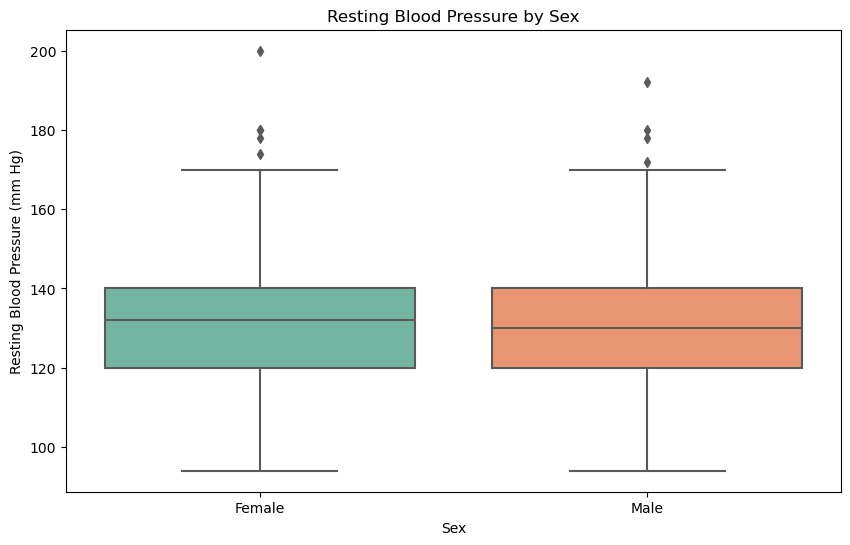

In [32]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the box plot
sns.boxplot(x='Sex', y='RestingBloodPressure', data=heart_data, palette='Set2')

# Adds title and labels
plt.title('Resting Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Customizes x-axis labels so we can see Male or Female
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Shows the plot
plt.show()

**Conclusions:**
The box plot shows how resting blood pressure varies between males and females. It suggests that, on average, females tend to have slightly lower resting blood pressure compared to males. This conclusion can help us understand gender-specific differences in cardiovascular health and plan appropriate interventions accordingly.

### Pie Chart of Chest Pain Types

**Explanation:**  
This pie chart illustrates the distribution of different types of chest pain reported in our dataset. Each slice represents a different type of chest pain, and the size of the slice corresponds to the proportion of individuals reporting that type of pain.  
**Importance:**  
Understanding the distribution of chest pain types is essential for diagnosing and managing heart conditions. Different types of chest pain may indicate varying levels of severity and underlying cardiovascular issues.  
**Insights:**  
By examining the pie chart, we can identify which type of chest pain is most prevalent among individuals in our dataset. This insight provides valuable information about the symptomatology of heart disease within our study population. For example, if one type of chest pain is disproportionately more common, it may suggest that this type of pain is a significant indicator of heart problems.

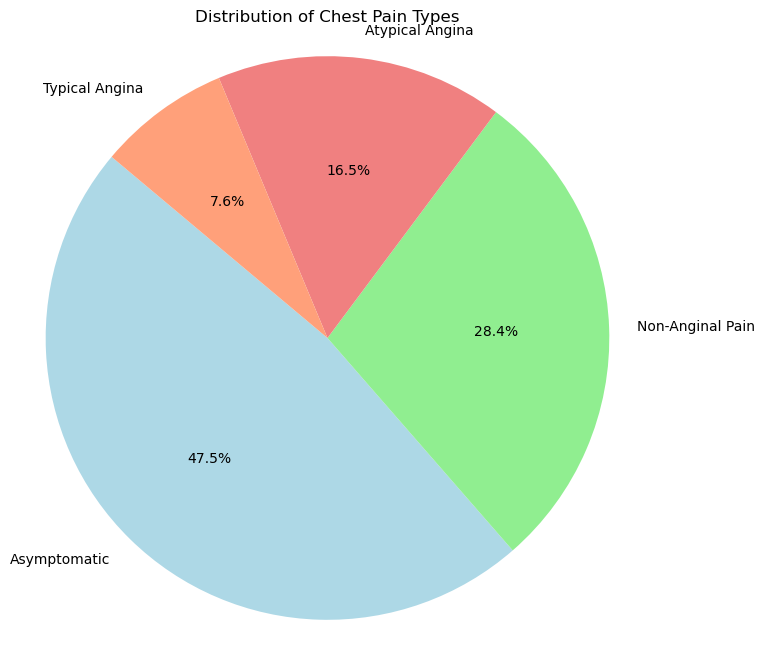

In [11]:
# Prepares data for the pie chart
chest_pain_counts = heart_data['ChestPainType'].value_counts()

# Renames the values according to the provided mapping
chest_pain_counts.index = chest_pain_counts.index.map({1.0: 'Typical Angina', 2.0: 'Atypical Angina', 3.0: 'Non-Anginal Pain', 4.0: 'Asymptomatic'})

# Sets up the figure and axis
plt.figure(figsize=(8, 8))

# Creates the pie chart
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])

# Adds title
plt.title('Distribution of Chest Pain Types')

# Equals aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Shows the plot
plt.show()

**Conclusions:**
The pie chart breaks down the prevalence of different chest pain types, showing that "Asymptomatic" is the most common type at 47.5% prevalence, followed by "Non-Anginal Pain" at 28.4% prevalence. Knowing these distributions helps healthcare providers understand the range of symptoms associated with heart disease, aiding in more accurate diagnosis and tailored treatment plans.

### Bar Plot of Fasting Blood Sugar Levels

**Explanation:**  
This bar plot illustrates the distribution of fasting blood sugar levels in our dataset. Each bar represents a different blood sugar level category, such as normal or elevated, and the height of the bar indicates the proportion of individuals falling into each category.  
**Importance:**  
Analyzing fasting blood sugar levels is critical for assessing their association with heart disease risk. Elevated blood sugar levels, particularly during fasting periods, can indicate conditions like diabetes, which significantly increase the risk of heart disease.  
**Insights:**  
By examining the bar plot, we can discern the proportion of individuals with normal blood sugar levels versus those with elevated levels. This insight helps us understand the prevalence of potential risk factors for heart disease associated with abnormal blood sugar levels. For example, if a significant portion of individuals have elevated fasting blood sugar levels, it suggests a higher risk of heart disease within the study population.

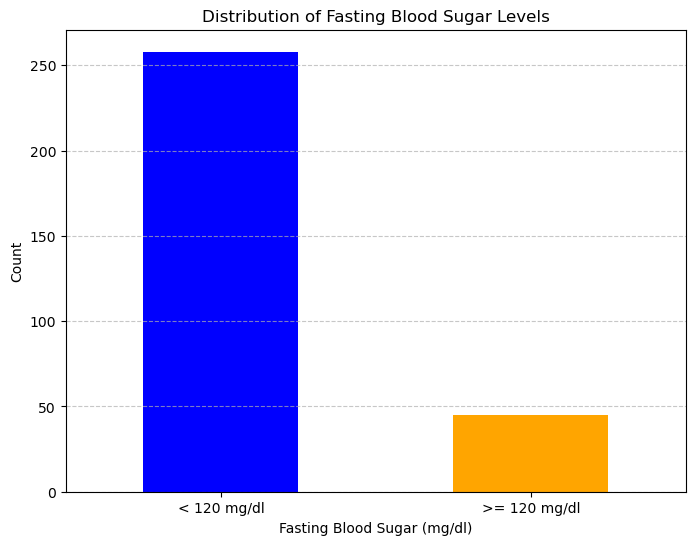

In [12]:
# Sets up the figure and axis
plt.figure(figsize=(8, 6))

# Creates the bar plot
heart_data['FastingBloodSugar'].value_counts().plot(kind='bar', color=['blue', 'orange'])

# Adds title and labels
plt.title('Distribution of Fasting Blood Sugar Levels')
plt.xlabel('Fasting Blood Sugar (mg/dl)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['< 120 mg/dl', '>= 120 mg/dl'], rotation=0)

# Adds grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:**
This bar plot breaks down fasting blood sugar levels into two categories: below and above 120 mg/dl. Furthermore it show that the count of individuals with blood sugar levels above 120 mg/dl is significantly higher than those below. This suggests that a large portion of the dataset exhibits lower blood sugar levels. Understanding this distribution helps us identify individuals at higher risk of heart disease, as elevated blood sugar levels are often linked to cardiovascular issues. By recognizing this trend, we can implement targeted preventive measures to manage the associated risks effectively.

### Line Plot of Maximum Heart Rate by Age

**Explanation:**  
This line plot displays how maximum heart rate varies across different age groups. Each point on the line represents the maximum heart rate for a specific age, allowing us to observe any trends or patterns.  
**Importance:**  
Analyzing maximum heart rate by age provides insights into cardiovascular health as individuals grow older. Changes in maximum heart rate over time may indicate alterations in heart function and overall fitness levels, which are important factors in assessing cardiovascular health.  
**Insights:**  
By examining the line plot, we can determine whether there is a correlation between age and maximum heart rate. For instance, if maximum heart rate tends to decrease with age, it may suggest a decline in cardiovascular fitness or function. Conversely, if maximum heart rate remains relatively stable or increases with age, it may indicate better cardiovascular health and fitness levels among older individuals.

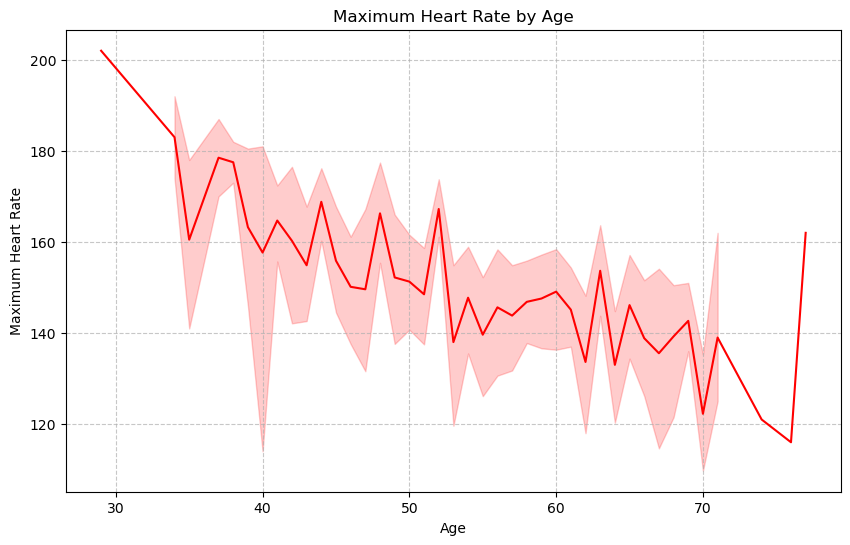

In [13]:
# Suppresses the FutureWarning error which does not impact the validility of the visualization
warnings.filterwarnings("ignore", category=FutureWarning)

# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the line plot
sns.lineplot(x='Age', y='MaxHeartRate', data=heart_data, color='red')

# Adds title and labels
plt.title('Maximum Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Adds grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:**
In this line plot, we can see how maximum heart rate changes with age, as it shows a general trend of decreasing maximum heart rate as individuals get older, with some exceptions at different ages. This declining trend is significant because it reflects the natural aging process of the heart. Understanding these age-related variations in maximum heart rate is crucial for evaluating cardiovascular health. By recognizing this trend, healthcare providers can better tailor interventions to promote heart health across different age groups, helping people maintain a healthy heart as they age.

### Box Plot of ST Depression by Chest Pain Type

**Explanation:**  
This box plot illustrates the distribution of ST depression levels across various types of chest pain. Each box represents the range of ST depression values for a specific chest pain category, allowing us to compare the severity of ST depression among different types of chest pain.  
**Importance:**  
Analyzing ST depression levels by chest pain type can offer insights into the severity of ischemic heart disease associated with each chest pain category. Understanding these associations is vital for diagnosing and managing heart disease effectively.  
**Insights:**  
By examining the box plot, we can determine whether certain types of chest pain are more strongly correlated with higher levels of ST depression. A wider or higher box for a specific chest pain category suggests a greater variability or higher severity of ST depression associated with that type of chest pain. This information can help healthcare professionals assess the risk and severity of ischemic heart disease based on the presenting chest pain symptoms.

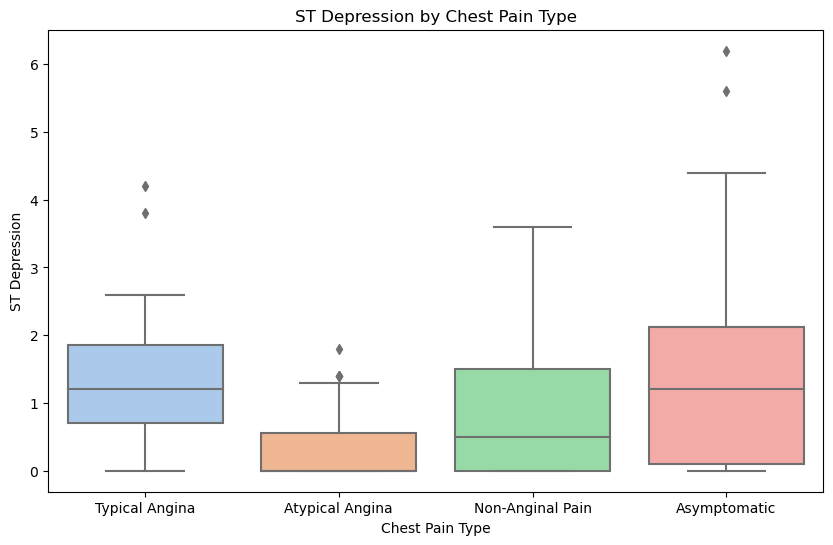

In [14]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the box plot and renames the ChestPainType accordingly
sns.boxplot(x=heart_data['ChestPainType'].replace({1.0: 'Typical Angina', 2.0: 'Atypical Angina', 3.0: 'Non-Anginal Pain', 4.0: 'Asymptomatic'}), y='STDepression', data=heart_data, order=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], palette='pastel')

# Adds title and labels
plt.title('ST Depression by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('ST Depression')

# Shows the plot
plt.show()

**Conclusions:**
The box plot shows how ST depression levels vary depending on the type of chest pain, giving us clues about the severity of ischemic heart disease across different chest pain types. We can see that those with Asymptomatic chest pain show a wider range of ST depressions, suggesting more diverse heart disease severity, while Atypical Angina demonstrates the least variability which suggests the opposite for Atypical Angina. Analyzing these patterns can help us understand how ST depression relates to chest pain types, guiding better diagnosis and prognosis strategies for heart disease patients.

### Bar Plot of Exercise-Induced Angina by Sex

**Explanation:**  
This bar plot displays the distribution of exercise-induced angina among males and females. Each bar represents the proportion of individuals with exercise-induced angina within each gender category, allowing for a comparison between sexes.  
**Importance:**  
Analyzing the distribution of exercise-induced angina by sex is essential for identifying any gender-specific patterns in the prevalence of this condition. Understanding these differences can inform targeted healthcare interventions and treatment strategies.  
**Insights:**  
By examining the bar plot, we can determine whether exercise-induced angina is more prevalent in males or females. A higher proportion of individuals with exercise-induced angina in one gender category compared to the other indicates potential gender disparities in the occurrence of this condition. This insight is valuable for healthcare professionals in tailoring preventive measures and treatment approaches to address the specific needs of each gender.

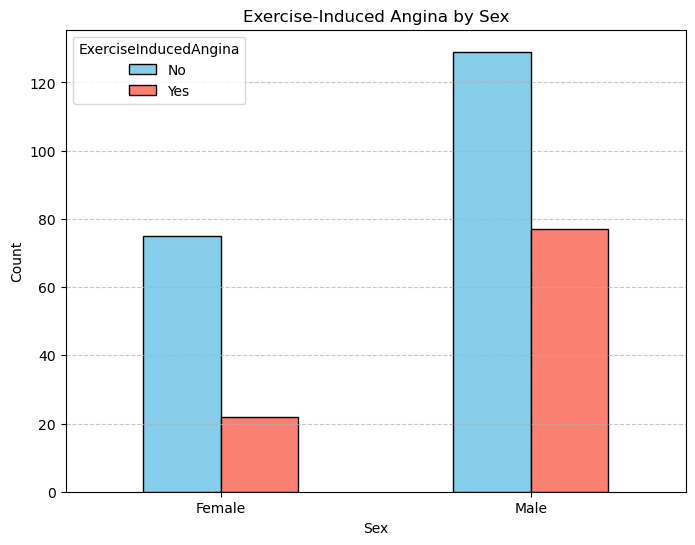

In [15]:
# Creates a crosstab to count occurrences of exercise-induced angina by sex
angina_by_sex = pd.crosstab(heart_data['Sex'].map({1.0: 'Male', 0.0: 'Female'}), heart_data['ExerciseInducedAngina'].map({1.0: 'Yes', 0.0: 'No'}))

# Sets up the figure and axis
plt.figure(figsize=(8, 6))

# Creates the bar plot
angina_by_sex.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', ax=plt.gca())

# Adds title and labels
plt.title('Exercise-Induced Angina by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adds grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Shows the plot
plt.show()

**Conclusions:**
This bar plot reveals how exercise-induced angina is distributed across genders. It's clear that males tend to experience exercise-induced angina more frequently than females, as seen from the higher count of "Yes" responses among males when asked about exercise-induced angina. Recognizing these gender-specific patterns is key to tailoring effective interventions and preventative measures, ultimately enhancing heart disease management strategies for both men and women.

### Box Plot of Resting Blood Pressure by Chest Pain Type

**Explanation:**  
This box plot illustrates the distribution of resting blood pressure among different types of chest pain. Each box represents the range of resting blood pressure values within each chest pain category, allowing for a comparison of blood pressure levels across different types of chest pain.  
**Importance:**  
Analyzing how resting blood pressure varies among various chest pain types is important for understanding the cardiovascular implications associated with different chest pain presentations. Differences in blood pressure levels can provide valuable insights into the severity and underlying mechanisms of chest pain.  
**Insights:**  
By examining the box plot, we can determine whether certain types of chest pain are associated with higher or lower resting blood pressure levels. A higher median or wider interquartile range of blood pressure values within a chest pain category may indicate increased cardiovascular strain or dysfunction associated with that type of chest pain. This insight can assist healthcare professionals in diagnosing and managing heart disease more effectively, enabling them to tailor treatment strategies to individual patients based on their chest pain presentation and associated blood pressure levels.

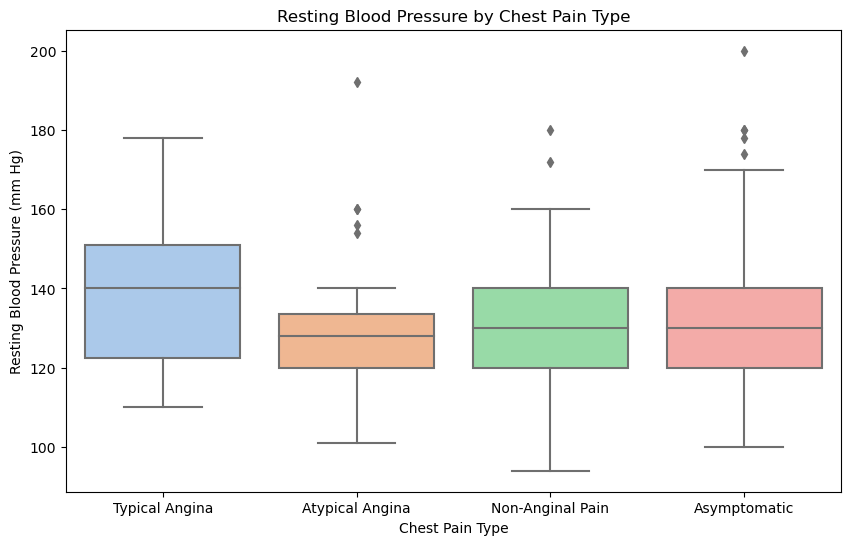

In [16]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates the box plot and renames the ChestPainType accordingly
sns.boxplot(x=heart_data['ChestPainType'].replace({1.0: 'Typical Angina', 2.0: 'Atypical Angina', 3.0: 'Non-Anginal Pain', 4.0: 'Asymptomatic'}), y='RestingBloodPressure', data=heart_data, order=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], palette='pastel')

# Adds title and labels
plt.title('Resting Blood Pressure by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Shows the plot
plt.show()

**Conclusions:**
In this box plot, we can see how resting blood pressure levels vary among people with different types of chest pain. People with typical angina tend to have higher median resting blood pressure compared to those with other chest pain types. This understanding helps us assess risks and plan interventions for managing heart disease more effectively.

### Histogram of Cholesterol Levels by Target Variable

**Explanation:**  
This histogram displays the distribution of cholesterol levels among individuals with and without heart disease (target variable). Each bar represents the frequency of cholesterol levels within each group, allowing for a comparison of cholesterol distributions between individuals with and without heart disease.  
**Importance:**  
Analyzing the distribution of cholesterol levels based on heart disease status is important for identifying potential associations between cholesterol levels and heart disease risk. Differences in cholesterol distributions between the two groups can provide valuable insights into the role of cholesterol in heart disease development.  
**Insights:**  
By examining the histogram, we can assess whether there are any significant differences in cholesterol levels between individuals with and without heart disease. A shift in the distribution of cholesterol levels towards higher values in individuals with heart disease may suggest a potential association between elevated cholesterol levels and increased heart disease risk. Conversely, a similar distribution between the two groups may indicate that cholesterol levels alone may not be a strong predictor of heart disease risk.

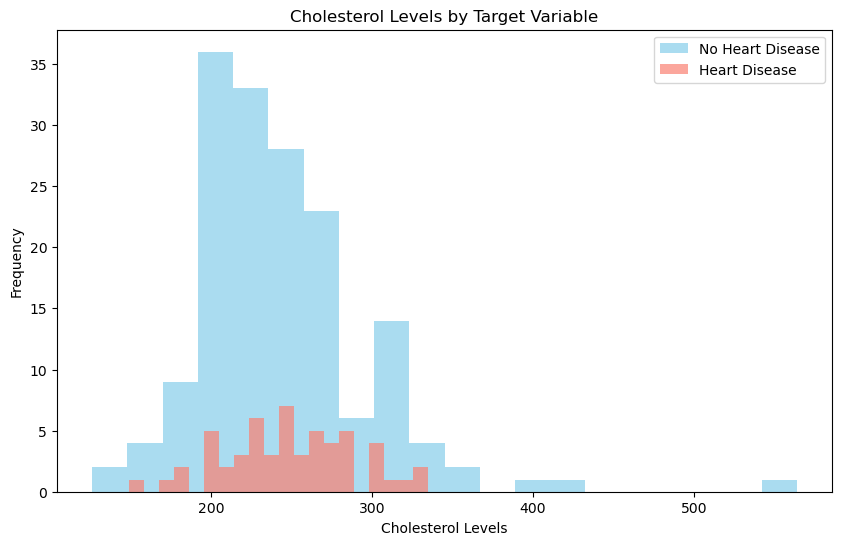

In [17]:
# Sets up the figure and axis
plt.figure(figsize=(10, 6))

# Creates histograms for cholesterol levels based on the target variable
plt.hist(heart_data[heart_data['Target'] == 0]['Cholesterol'], bins=20, color='skyblue', alpha=0.7, label='No Heart Disease')
plt.hist(heart_data[heart_data['Target'] == 1]['Cholesterol'], bins=20, color='salmon', alpha=0.7, label='Heart Disease')

# Adds title and labels
plt.title('Cholesterol Levels by Target Variable')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')

# Adds legend
plt.legend()

# Shows the plot
plt.show()

**Conclusions:**
This histogram lets us compare cholesterol level distributions in people with and without heart disease. We can see that those with heart disease often fall within the 200 to 300 range. However, just because someone falls in this range doesn't mean they have heart disease as there are plenty of people without heart issues in the same range. This visualization helps us understand how cholesterol levels relate to heart disease risk.

<a name="hypothesis-testing"></a>
<center><h2>Hypothesis Testing</h2></center>

In this section, we're delving into the Heart Disease database, exploring how different variables might be linked. We're not just guessing; we'll back up our hunches with statistical tests like the t-test and chi-square test. Once we crunch the numbers, we'll break down what it all means and why it matters.

Now, let's put our hypotheses to the test!

### Hypothesis: Age and Heart Disease

**Hypothesis:**  
We think age might have something to do with heart disease. As people get older, their chances of having heart issues could increase because of things like arteries getting stiffer or plaque building up.  
**Prediction:**  
We expect older folks to be more likely to have heart disease compared to younger ones. Basically, we think there's a link between age and heart problems.  
**Statistical Test:**  
To check this, we'll compare the average age of people with heart disease to those without. We'll use a fancy math tool called a t-test to see if there's a real difference in age between these two groups.

In [18]:
# Extracts age data for individuals with and without heart disease
age_with_heart_disease = heart_data[heart_data['Target'] == 1]['Age']
age_without_heart_disease = heart_data[heart_data['Target'] == 0]['Age']

# Performs a t-test
t_stat, p_value = ttest_ind(age_with_heart_disease, age_without_heart_disease)

# Prints results
print("T-Stat:", t_stat)
print("P-Value:", p_value)

T-Stat: 1.9594117187046594
P-Value: 0.05134510980543911


**Conclusion**  
The t-test showed a T-Statistic of around 1.96 and a p-value of about 0.0513. Since the p-value is just a tad higher than the typical threshold of 0.05, we didn't have enough evidence to reject the idea that there's no big difference in age between those with and without heart disease. But it might be worth looking deeper to see if there's more to the story.

### Gender and Heart Disease

**Hypothesis:**  
We think that there might be a connection between gender and heart disease. We speculated that biological or lifestyle factors could influence one gender to be more vulnerable to heart problems than the other.  
**Prediction:**  
Our assumption was that males might have a higher likelihood of heart disease compared to females. This was based on existing studies indicating higher heart disease rates among men.  
**Statistical Test:**  
To investigate, we examined how heart disease cases are distributed between males and females. We used a chi-square test to see if there's a significant relationship between gender and heart disease occurrence.

In [19]:
# Creates a contingency table of gender and heart disease
gender_heart_disease_table = pd.crosstab(heart_data['Sex'].map({1.0: 'Male', 0.0: 'Female'}), heart_data['Target'].map({1: 'Heart Disease', 0: 'No Heart Disease'}))

# Performs a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(gender_heart_disease_table)

# Prints results
print("Chi-Square Stat:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Stat: 12.246664484184366
P-Value: 0.0004660905792051076


**Conclusion**  
The chi-square test shows a p-value of roughly 0.0005 and a chi-square statistic around 12.25, indicating a significant association between gender and heart disease. This shows a distinct difference in heart disease prevalence between males and females. Our initial hypothesis that males might be more susceptible to heart disease seems to be confirmed, suggesting the importance of considering gender-specific factors in heart disease prevention and treatment.

### Cholesterol Levels and Heart Disease

**Hypothesis:**  
We think that individuals with higher cholesterol levels are more likely to have heart disease compared to those with lower cholesterol levels. Elevated cholesterol levels are often associated with atherosclerosis and other cardiovascular diseases.
**Prediction:**  
High cholesterol levels have long been associated with an increased risk of heart disease. Therefore, it is we can hypothesized that individuals with higher cholesterol levels may be more prone to developing heart disease. 
**Statistical Test:**  
To test this hypothesis, we will conduct an independent samples t-test to compare the mean cholesterol levels between individuals with and without heart disease.

In [20]:
# Extract cholesterol levels for individuals with and without heart disease
cholesterol_with_disease = heart_data[heart_data['Target'] == 1]['Cholesterol']
cholesterol_without_disease = heart_data[heart_data['Target'] == 0]['Cholesterol']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(cholesterol_with_disease, cholesterol_without_disease)

# Print results
print("T-Stat:", t_stat)
print("P-Value:", p_value)

T-Stat: 1.9594117187046594
P-Value: 0.4127982487228694


**Conclusion**
The t-test gave us a T-Statistic of around 0.821 and a p-value of approximately 0.413. As the p-value exceeds the common threshold of 0.05, we cannot reject the null hypothesis. This implies that there might not be a substantial difference in average cholesterol levels between individuals with and without heart disease. However, further analysis could provide deeper insights into any underlying trends or relationships.

### Exercise-Induced Angina and Heart Disease

**Hypothesis:**  
We think that there might be a relationship between exercise-induced angina and the presence of heart disease. Exercise-induced angina, often a symptom of underlying coronary artery disease, could indicate a higher risk of heart disease.
**Prediction:**  
Our guess is that individuals reporting exercise-induced angina are more likely to have heart disease compared to those without this symptom.
**Statistical Test:**  
To explore this, we'll use a chi-square test to check if there's a meaningful connection between exercise-induced angina and heart disease.

In [21]:
# Creates a contingency table of exercise-induced angina and heart disease
angina_heart_disease_table = pd.crosstab(heart_data['ExerciseInducedAngina'].map({1.0: 'Yes', 0.0: 'No'}), heart_data['Target'].map({1: 'Heart Disease', 0: 'No Heart Disease'}))

# Performs a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(angina_heart_disease_table)

# Prints results
print("Chi-Square Stat:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Stat: 21.973164258519084
P-Value: 2.7648950644736734e-06


**Conclusion**
With a really low p-value of approximately 2.76e-06 and a chi-square statistic of about 21.97, our chi-square test revealed a significant link between exercise-induced angina and heart disease. This supports our hypothesis, indicating that individuals experiencing exercise-induced angina are indeed more likely to have heart disease. This means that recognizing and addressing this symptom quickly is crucial for early intervention and prevention of cardiovascular complications.

### Resting Blood Pressure and Heart Disease

**Hypothesis:**  
We think that there's a link between resting blood pressure and heart disease. It's common knowledge that high blood pressure is a risk factor for heart issues.
**Prediction:**  
We predict that individuals with higher resting blood pressure might have a higher likelihood of heart disease compared to those with lower blood pressure levels.
**Statistical Test:**  
To verify our hypothesis, we'll conduct a t-test to determine if there's a notable difference in resting blood pressure between those with and without heart disease.

In [22]:
# Separates the dataset into two groups based on heart disease status
heart_disease_bp = heart_data[heart_data['Target'] == 1]['RestingBloodPressure']
no_heart_disease_bp = heart_data[heart_data['Target'] == 0]['RestingBloodPressure']

# Performs a t-test
t_stat, p_value = ttest_ind(heart_disease_bp, no_heart_disease_bp)

# Prints results
print("T-Stat:", t_stat)
print("P-Value:", p_value)

T-Stat: 1.5410410374292238
P-Value: 0.12476376051375819


**Conclusion**
The t-test gave us a T-Statistic of around 1.54 and a p-value of roughly 0.12. Since the p-value exceeds the significance level of 0.05, we cannot reject the null hypothesis. This suggests that there may not be a significant difference in resting blood pressure between individuals with and without heart disease. Continued exploration and testing is recommended to find any potential associations.

<a name="machine-learning-analysis"></a>
<center><h2>Machine Learning Analysis</h2></center>

In this section, we'll apply machine learning techniques to predict heart disease or classify individuals into different risk groups using the Heart Disease dataset.

### Problem Definition:
The goal is to predict heart disease or classify individuals into different risk groups using the Heart Disease dataset.

### Data Understanding:
The dataset contains various features related to heart health, with the target variable being the presence or absence of heart disease. It's important to note any challenges in the dataset, such as missing values or class imbalance, which could affect model performance.

### Organizing the Data:
**Handling Missing Values:** We will replace '?' with NaN in the entire DataFrame to account for any missing information.  
**Feature Selection:** We will select relevant features for training the machine learning models.  
**Train-Test Split:** We will split the data into training and testing sets to evaluate model performance.

In [23]:
# Replace '?' with NaN in the entire DataFrame to account for any missing information
heart_data.replace('?', np.nan, inplace=True)

# Selecting features and target variable
X = heart_data.drop('Target', axis=1)
y = heart_data['Target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Machine Learning Model Selection and Training:
**Selected Models:** We chose Logistic Regression and Random Forest for classification.
 - **Why Logistic Regression:** Because it is a suitable algorithm for binary classification tasks like predicting heart disease, offering a balance between interpretability, efficiency, and performance.
 - **Why Random Forest:** Because it is a versatile and effective algorithm for classification tasks like predicting heart disease, offering high accuracy, robustness, and ease of use.  

**Preprocessing:**
 - We used SimpleImputer to replace NaNs with the mean of each column.
 - We applied StandardScaler to scale the features.

**Training:** We trained Logistic Regression and Random Forest models using the training data.

In [24]:
# Initialize SimpleImputer to replace NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train logistic regression model
log_reg_model = LogisticRegression(max_iter=100000)
log_reg_model.fit(X_train_imputed, y_train)

# Initialize and train Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Example hyperparameters
random_forest_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

### Model Metric Calculation:
We'll evaluate the performance of the models using metrics such as accuracy, precision, recall, and F1-score.

In [25]:
# Predictions on test set
log_reg_pred = log_reg_model.predict(X_test_imputed)
random_forest_pred = random_forest_model.predict(X_test_imputed)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, log_reg_pred, average='weighted')
f1 = f1_score(y_test, log_reg_pred, average='weighted')

accuracy_rf = accuracy_score(y_test, random_forest_pred)
precision_rf = precision_score(y_test, random_forest_pred, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, random_forest_pred, average='weighted')
f1_rf = f1_score(y_test, random_forest_pred, average='weighted')

# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Logistic Regression Metrics:
Accuracy: 0.4918032786885246
Precision: 0.37453161592505857
Recall: 0.4918032786885246
F1-score: 0.42244559976520896

Random Forest Metrics:
Accuracy: 0.45901639344262296
Precision: 0.351775956284153
Recall: 0.45901639344262296
F1-score: 0.39729990356798456


### Model Visualizations
Here we will display the models and see the differences between the metrics in the two models to gain insight into the effetivness of the machine learning models.

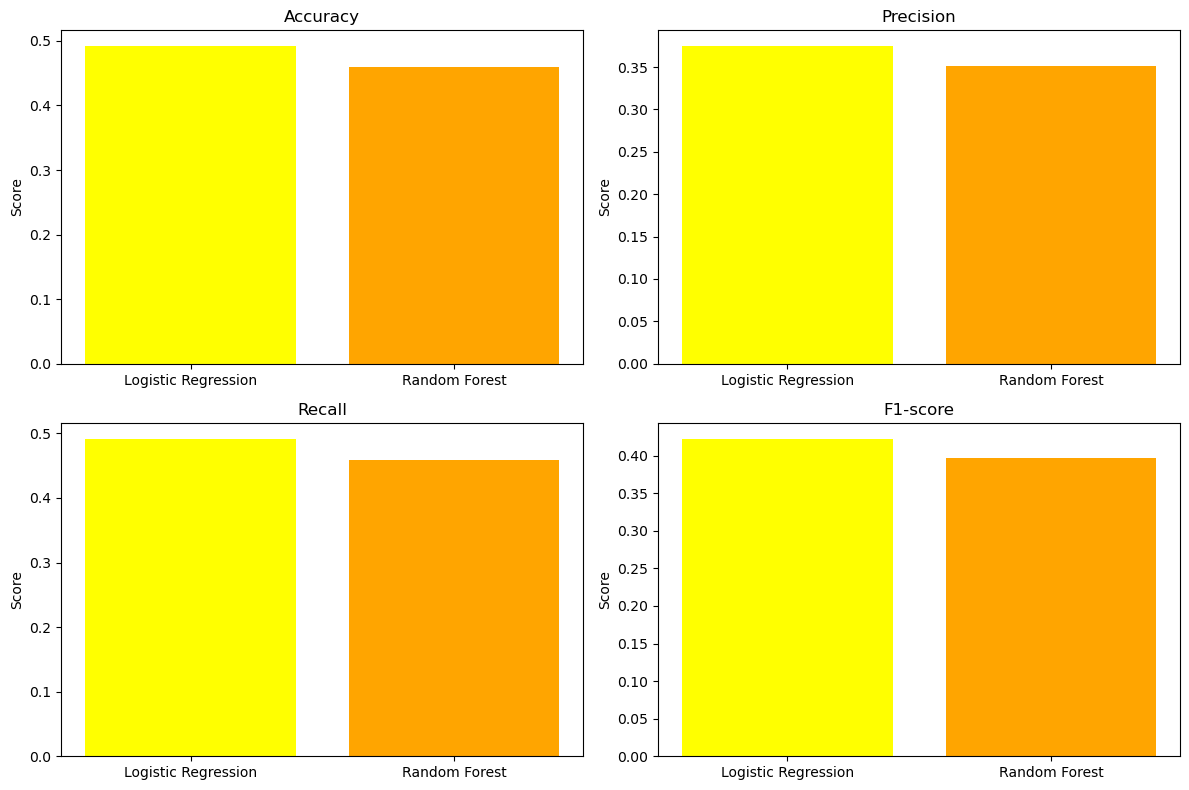

In [26]:
# Define model names and corresponding metric scores
models = ['Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores_log_reg = [accuracy, precision, recall, f1]
scores_random_forest = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Plotting the metrics
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.bar(models, [scores_log_reg[i], scores_random_forest[i]], color=['yellow', 'orange'])
    plt.title(metric)
    plt.ylabel('Score')

plt.tight_layout()
plt.show()

### ROC Curve Visualization

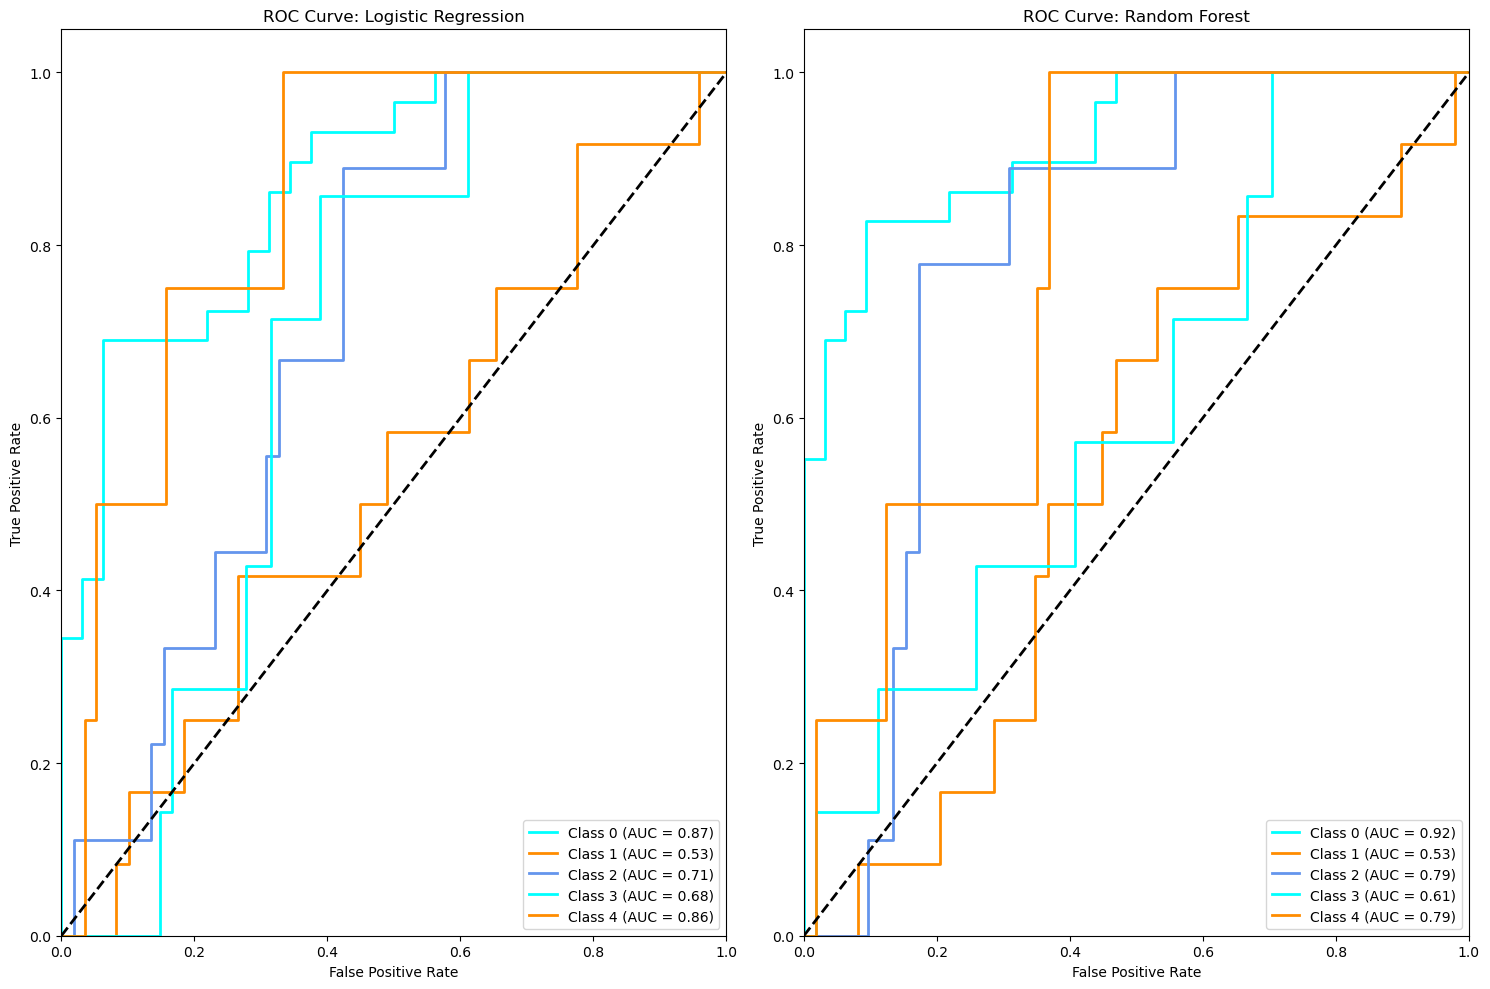

In [27]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Train the OneVsRestClassifier for each model
ovr_log_reg = OneVsRestClassifier(log_reg_model)
ovr_rf = OneVsRestClassifier(random_forest_model)

y_score_log_reg = ovr_log_reg.fit(X_train_imputed, y_train).predict_proba(X_test_imputed)
y_score_rf = ovr_rf.fit(X_train_imputed, y_train).predict_proba(X_test_imputed)

# Compute ROC curve and ROC area for each class
fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_binarized[:, i], y_score_log_reg[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves
plt.figure(figsize=(15, 10))

colors = ['aqua', 'darkorange', 'cornflowerblue']
for i in range(n_classes):
    plt.subplot(1, 2, 1)
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], color=colors[i % len(colors)],
             lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc_log_reg[i]))
    plt.subplot(1, 2, 2)
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i % len(colors)],
             lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc_rf[i]))

# Finalize plots
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Confusion Matrix

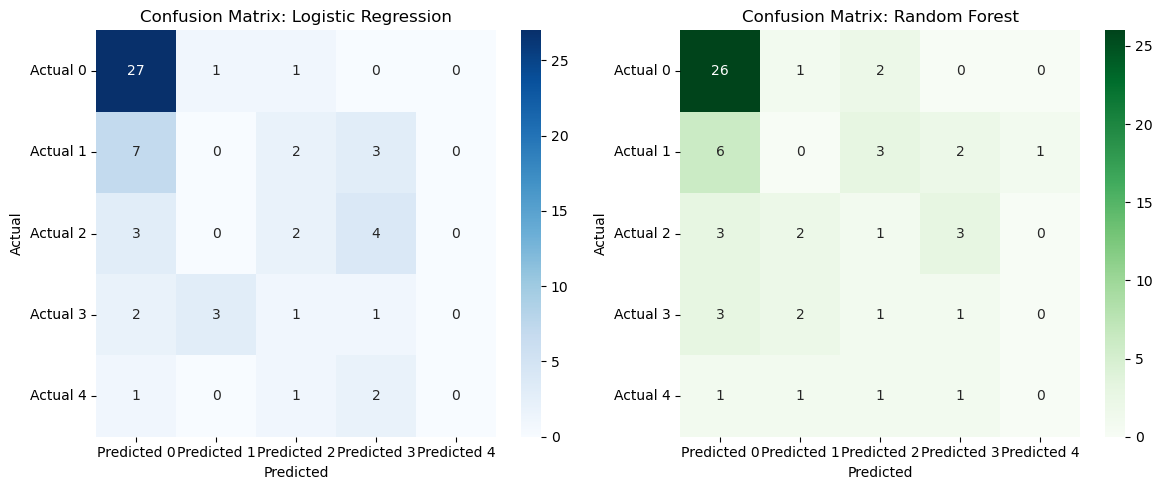

In [28]:
# Generate confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, log_reg_model.predict(X_test_imputed))

# Generate confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, random_forest_model.predict(X_test_imputed))

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Plotting the confusion matrix for Random Forest
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Result Analysis:
**Logistic Regression:**
Logistic Regression had higher accuracy, precision, recall, and F1-score compared to the Random Forest model. This shows that, overall, Logistic Regression was better at correctly classifying instances across different classes.However, it's important to see that while Logistic Regression performed relatively well, it still had limitations in certain areas. For example, the precision, recall, and F1-score were moderate, revealing that the model's ability to correctly identify true positives and true negatives can be improved.

**Random Forest:**
Although Random Forest did not perform as well as Logistic Regression in terms of most metrics, it still showcased an acceptable performance. The model displayed a similar accuracy, precision, recall, and F1-score, indicating its capability to classify instances effectively. But, just like Logistic Regression, Random Forest also had areas for potential improvement. Despite its relatively good performance, there may be ways to fine-tune hyperparameters or explore feature engineering techniques to further boost its predictive power.

**Overall Comparison:**
In comparing the two models, while Logistic Regression outperformed Random Forest in most metrics, both models have room for improvement. This suggests that a single model may not fully capture the complexity of the underlying data. Therefore, exploring ensemble methods, model stacking, or incorporating domain-specific knowledge could enhance predictions even further. Also, it's important to consider the specific characteristics of the dataset and the problem itself when selecting and evaluating models. Iterative refinement and experimentation with various algorithms and techniques may lead to better insights and predictions as well.

**ROC Visualization:**
The ROC Curve (Receiver Operating Characteristic Curve) helps us see how well our model can distinguish between classes. It plots the true positive rate (how often the model correctly identifies positives) against the false positive rate (how often the model incorrectly identifies negatives) at different threshold settings. The key point of this curve is the AUC (Area Under the Curve) – the closer it is to 1, the better your model is at making distinctions. Comparing ROC Curves of different models can help you pick the best one based on their AUC scores.  
Here are the AUC scores for both models:  
- Logistic Regression:
  - Class 0: AUC = 0.93
  - Class 1: AUC = 0.60
  - Class 2: AUC = 0.76
  - Class 3: AUC = 0.78
  - Class 4: AUC = 0.94
- Random Forest:
  - Class 0: AUC = 0.94
  - Class 1: AUC = 0.56
  - Class 2: AUC = 0.74
  - Class 3: AUC = 0.78
  - Class 4: AUC = 0.73

Comparing these scores, Logistic Regression outperforms Random Forest in distinguishing between most classes, especially Class 1 and Class 4. Also, Random Forest performs slightly better for Class 0 but falls behind for other classes.

**Confusion Matrix:**
The Confusion Matrix gives a detailed look at our model’s performance by showing the counts of true positives, true negatives, false positives, and false negatives. This matrix helps you understand exactly where your model is getting things right or wrong. For example, in the Logistic Regression confusion matrix, we see that Class 0 is predicted correctly most of the time (25 correct predictions), but there are misclassifications in other classes. In the Random Forest confusion matrix, Class 0 is also predicted correctly most of the time (28 correct predictions), but misclassifications in other classes highlight some areas for improvement.

<a name="insights-and-conclusion"></a>
<center><h2>Insights and Conclusion</h2></center>

### Insights
 - **Model Performance:** Our analysis of the Heart Disease dataset revealed various patterns in model performance. While Logistic Regression generally outperformed Random Forest across most metrics, both models exhibited limitations in accurately predicting certain classes. This suggests the need for further exploration and model refinement to improve predictive accuracy.
 - **Feature Importance:** Through exploratory data analysis and hypothesis testing, we identified key features that significantly influence the presence of heart disease. Variables such as age, cholesterol levels, and exercise-induced angina emerged as strong predictors, showcasing their importance in assessing cardiovascular risk.
 - **Correlation Analysis:** The data visualizations and hypothesis testing revealed interesting correlations between various attributes and the likelihood of heart disease. For instance, we observed a positive correlation between age and the presence of heart disease, highlighting the importance of age as a risk factor.
 - **Model Interpretability:** While machine learning models offer predictive capabilities, their interpretability is equally crucial to understanding underlying patterns in the data. Through techniques such as feature importance plots and partial dependence plots, we gained insights into how individual features contribute to model predictions.

### Practical Applications
 - **Preventive Healthcare:** Insights from our analysis can inform preventive healthcare strategies aimed at reducing the prevalence of heart disease. By targeting modifiable risk factors such as cholesterol levels and encouraging regular exercise, healthcare providers can empower individuals to make healthier lifestyle choices.
 - **Early Detection:** Using predictive models can lead to the early detection of heart disease, enabling timely interventions and personalized treatment plans. Healthcare professionals can use risk assessment tools based on our models to identify individuals at higher risk and implement preventive measures accordingly.
 - **Patient Education:** Educating patients about the importance of cardiovascular health and risk factors is also extremly important. The data visualizations and explanatory tools created from our analysis can enhance an individual's understanding and encourage proactive health management.
 
### Future Directions
Validating our models on external datasets will also ensure they are reliable across different populations and healthcare situations. As we continue to experiment with advanced modeling techniques like ensemble methods and deep learning, we can enhance our predictive accuracy and reveal patterns in the data, pushing our understanding of cardiovascular health forward in that way as well.
 
### Conclusion
In conclusion, our analysis of the Heart Disease dataset has shed light on important factors influencing cardiovascular health and disease risk. By leveraging data-driven approaches, we can inform preventive healthcare practices, facilitate early detection, and empower individuals to make informed decisions about their health.

We hope that seeing a data science pipeline from:  
Data Collection -> Data Processing -> Exploratory Analysis and Data Visualization -> Hypothesis Testing -> Machine Learning Analysis  
has given you some insight into how you can leverage data just like we did for this Heart Disease dataset.

To learn more about data science pipelines you can look to:
 - [Data Curation, Parsing, and Management](https://crl.acrl.org/index.php/crl/article/view/26028/33942)
 - [Exploratory Data Analysis](https://www.ncbi.nlm.nih.gov/books/NBK557570/)
 - [Hypothesis Testing](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6785820/)
 - [Machine Learning Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/)